In [4]:
!pip install kaggle

In [5]:
!pip install seaborn

In [6]:
!pip install plotly

In [7]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api=KaggleApi()
api.authenticate()

In [8]:
!kaggle datasets list -s 'product'

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
felixzhao/productdemandforecasting                             Forecasts for Product Demand                         5MB  2017-08-25 02:42:57          12834        291  0.88235295       
knightbearr/sales-product-data                                 Sales Product Data                                   2MB  2021-11-04 19:38:08           5587         49  1.0              
PromptCloudHQ/flipkart-products                                Flipkart Products                                    5MB  2017-09-15 09:35:02          12764        160  1.0              
paramaggarwal/fashion-product-images-dataset                   Fashion

In [9]:
!kaggle datasets download -d stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset

^C



  0%|          | 0.00/77.2M [00:00<?, ?B/s]
  1%|▏         | 1.00M/77.2M [00:00<00:15, 5.17MB/s]
  3%|▎         | 2.00M/77.2M [00:00<00:16, 4.81MB/s]
  4%|▍         | 3.00M/77.2M [00:00<00:15, 5.02MB/s]
  5%|▌         | 4.00M/77.2M [00:00<00:12, 5.95MB/s]
  6%|▋         | 5.00M/77.2M [00:00<00:13, 5.74MB/s]
  9%|▉         | 7.00M/77.2M [00:01<00:11, 6.66MB/s]
 12%|█▏        | 9.00M/77.2M [00:01<00:09, 7.54MB/s]
 14%|█▍        | 11.0M/77.2M [00:01<00:08, 8.38MB/s]
 17%|█▋        | 13.0M/77.2M [00:01<00:07, 9.37MB/s]
 18%|█▊        | 14.0M/77.2M [00:01<00:07, 8.48MB/s]
 21%|██        | 16.0M/77.2M [00:02<00:07, 8.99MB/s]
 22%|██▏       | 17.0M/77.2M [00:02<00:07, 8.59MB/s]
 23%|██▎       | 18.0M/77.2M [00:02<00:07, 8.62MB/s]
 25%|██▍       | 19.0M/77.2M [00:02<00:06, 8.97MB/s]
 26%|██▌       | 20.0M/77.2M [00:02<00:06, 9.04MB/s]
 27%|██▋       | 21.0M/77.2M [00:02<00:06, 9.21MB/s]
 29%|██▊       | 22.0M/77.2M [00:02<00:06, 9.37MB/s]
 30%|██▉       | 23.0M/77.2M [00:02<00:06, 9.13MB/s]
 

In [10]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [11]:
movies_df = pd.read_csv("D:/ML_2022/ML_workspace_2022/NLP/NLP_data/rotten_tomatoes_movies.csv")
print(movies_df.shape)
movies_df.head(5)

(17712, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [12]:
reviews_df = pd.read_csv("D:/ML_2022/ML_workspace_2022/NLP/NLP_data/rotten_tomatoes_critic_reviews.csv")
print(reviews_df.shape)
reviews_df.head(5)

(1130017, 8)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [13]:
print("movies df columns:\n",list(movies_df.columns))
print("-----------------")
print("reviews df columns:\n",list(reviews_df.columns))

movies df columns:
 ['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
-----------------
reviews df columns:
 ['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content']


In [14]:
set(list(movies_df.columns)) & set(list(reviews_df.columns))

{'rotten_tomatoes_link'}

In [15]:
movies_df.original_release_date.value_counts()



2002-01-01    29
1988-01-01    25
2000-01-01    25
2003-01-01    25
2001-01-01    24
              ..
2014-06-10     1
1963-03-28     1
1949-07-29     1
2010-08-19     1
1995-04-22     1
Name: original_release_date, Length: 5804, dtype: int64

In [16]:
print("Extracting year from datetime 2000-01-01: ",pd.to_datetime("2000-01-01").year)

Extracting year from datetime 2000-01-01:  2000


In [33]:
print("------original release year-----")
movies_df["original_release_date"]= pd.to_datetime(movies_df.original_release_date)
movies_df["release_year"] = movies_df.original_release_date.apply(lambda x:x.year)
print(movies_df.release_year.value_counts())

# streaming release year
print("------streaming release year-----")
movies_df["streaming_release_date"]= pd.to_datetime(movies_df.streaming_release_date)
movies_df["online_release_year"] = movies_df.streaming_release_date.apply(lambda x:x.year)
movies_df.online_release_year.value_counts()



------original release year-----
2014.0    745
2013.0    704
2012.0    669
2015.0    650
2018.0    649
         ... 
1919.0      2
1921.0      2
1915.0      2
1914.0      1
1916.0      1
Name: release_year, Length: 105, dtype: int64
------streaming release year-----


2016.0    5885
2017.0    3460
2015.0    1900
2012.0    1043
2018.0     986
2019.0     949
2014.0     850
2013.0     678
2020.0     582
2008.0     356
2009.0     247
2011.0     126
2010.0     113
2007.0      45
2006.0      27
2005.0      25
2004.0      19
2003.0      14
2001.0       8
2002.0       4
2000.0       4
1998.0       4
1999.0       3
Name: online_release_year, dtype: int64

In [32]:
movies_df.streaming_release_date

0        2015-11-25
1        2012-09-04
2        2014-07-24
3        2017-01-13
4        2016-06-10
            ...    
17707    2016-04-19
17708    2016-06-07
17709    2015-11-25
17710    2017-01-08
17711    2016-03-22
Name: streaming_release_date, Length: 17712, dtype: object

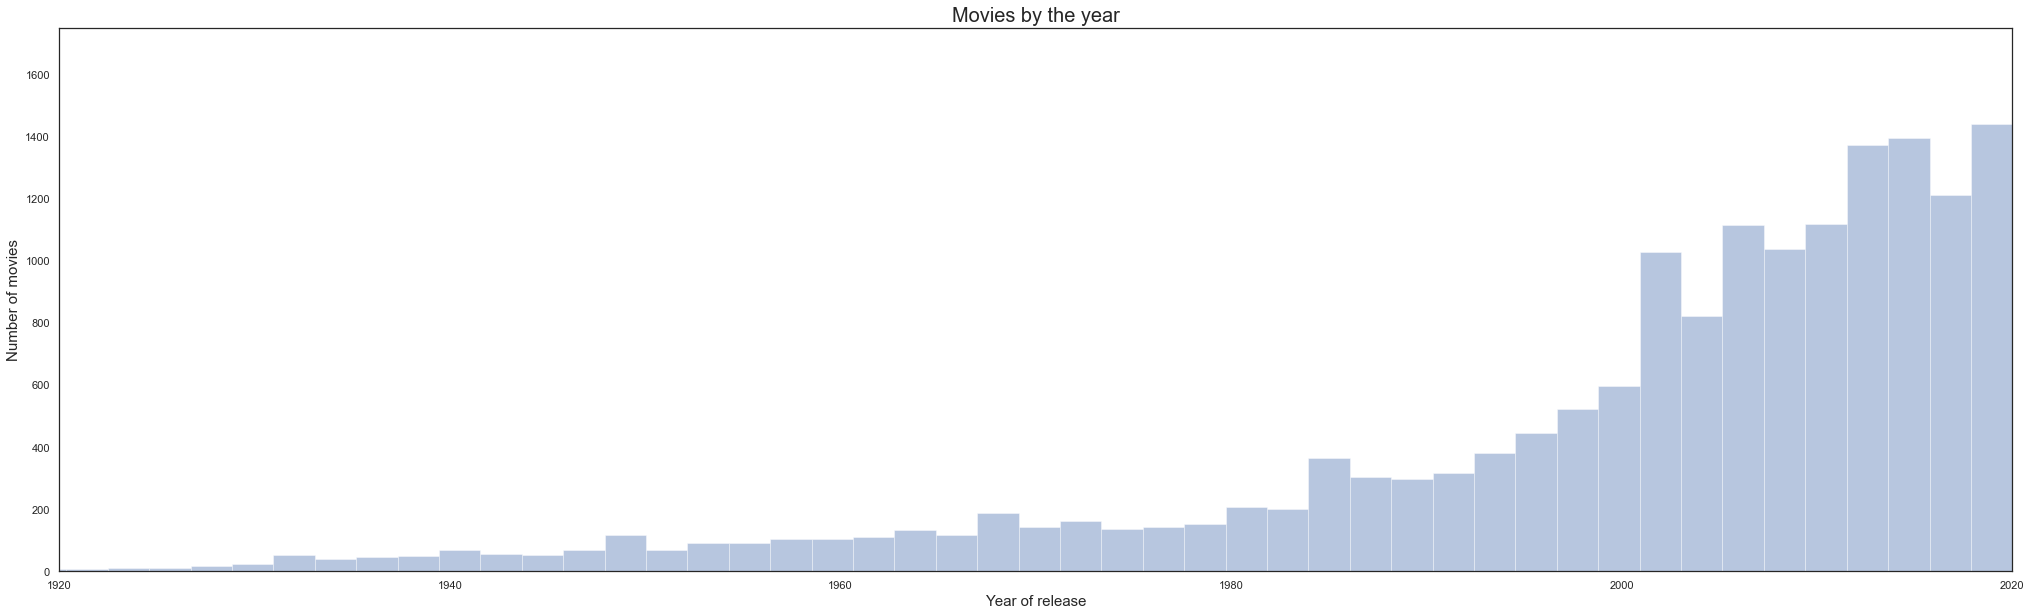

In [31]:
sns.set(style="white")

plt.figure(figsize=(35,10))
plt.title('Movies by the year', size=20)
sns.distplot(movies_df.release_year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1920, 2020, 0, 1750])
# plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.show()

From above graph:
- More movies have released in the 21st century as compared to 20th centuty.
- In 2020, almost 1400 movies were released
Now, let's compare the original release vs streaming release..
orange plots represents streaming release, post 2010, the online release of movies has increased.

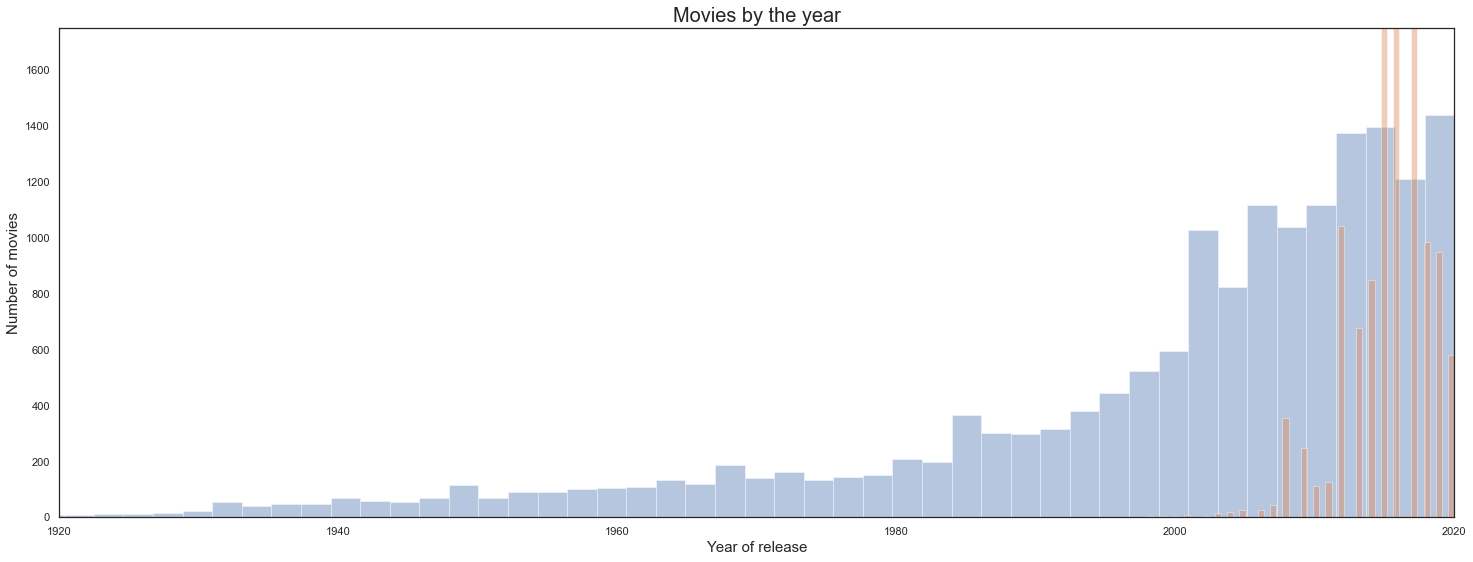

In [43]:
sns.set(style="white")

plt.figure(figsize=(25,9))
plt.title('Movies by the year', size=20)
sns.distplot(movies_df.release_year, kde=False)
sns.distplot(movies_df.online_release_year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1920, 2020, 0, 1750])
# plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.show()

In [44]:
movies_df.production_company.value_counts()

Paramount Pictures             517
Warner Bros. Pictures          509
Universal Pictures             495
20th Century Fox               423
IFC Films                      413
                              ... 
Innis Lake Entertainment         1
British Film Company             1
Black/Bernstein Productions      1
US                               1
Storm King Productions           1
Name: production_company, Length: 3046, dtype: int64

- Out of 3046 movie production companies,
Paramount Pictures have released most number of film till 2020, followed by Warner Bros Pictures, 3rd place: Universal Pictures.

In [76]:
movies_df.columns

print("\n       ---movies produced after 2000---")
movies_2k_df=movies_df[movies_df["release_year"]>2000]
movies_2k_df.head(5)

print("Total movies produced:",movies_df.shape[0])
print("Movies produced after 2000:",movies_2k_df.shape[0])
print("%age of movies after 2000: ", movies_2k_df.shape[0]/movies_df.shape[0] )

print("\nUnique genres: \n",len(list(movies_df.genres.unique())))

print("\n   Top 10 genre movies produced----")
print(movies_df.genres.value_counts()[:10])

print("\n  Top 10 genre movies produced after 2000s----")
print(movies_2k_df.genres.value_counts()[:10])



       ---movies produced after 2000---
Total movies produced: 17712
Movies produced after 2000: 10539
%age of movies after 2000:  0.595020325203252

Unique genres: 
 1107

   Top 10 genre movies produced----
Drama                               1887
Comedy                              1263
Comedy, Drama                        863
Drama, Mystery & Suspense            731
Art House & International, Drama     589
Documentary, Special Interest        555
Documentary                          528
Horror                               456
Action & Adventure, Drama            365
Horror, Mystery & Suspense           340
Name: genres, dtype: int64

  Top 10 genre movies produced after 2000s----
Drama                               1425
Comedy                               794
Comedy, Drama                        581
Documentary, Special Interest        489
Drama, Mystery & Suspense            485
Art House & International, Drama     410
Documentary                          410
Horror            

In [70]:
movies_df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'release_year', 'online_release_year'],
      dtype='object')

In [102]:
# Which production studio produced which genre of movies most after 2000
print("--Top 10 production studios after 2000---")
print(movies_2k_df["production_company"].value_counts()[:10])
studio_2k_top10=list(movies_2k_df["production_company"].value_counts()[:10].index)


print("\nTop 10 studio names: \n",studio_2k_top10 )



print("\nType of genre movies produced by each studios post 2000")
movies_2k_df.groupby(["production_company","genres"])["genres"].count()



--Top 10 production studios after 2000---
IFC Films                 403
Warner Bros. Pictures     301
20th Century Fox          286
Universal Pictures        280
Magnolia Pictures         254
Sony Pictures Classics    231
Paramount Pictures        197
Sony Pictures             171
Netflix                   147
Focus Features            132
Name: production_company, dtype: int64

Top 10 studio names: 
 ['IFC Films', 'Warner Bros. Pictures', '20th Century Fox', 'Universal Pictures', 'Magnolia Pictures', 'Sony Pictures Classics', 'Paramount Pictures', 'Sony Pictures', 'Netflix', 'Focus Features']

Type of genre movies produced by each studios post 2000


production_company  genres                                               
10 West Studios     Drama, Special Interest                                  1
101 Studios         Drama                                                    2
108 Pics            Comedy, Romance                                          1
1091                Documentary                                              2
                    Drama                                                    1
                                                                            ..
isotopefilms        Documentary, Special Interest                            1
levelFILM           Art House & International, Horror, Mystery & Suspense    1
                    Drama                                                    1
s                   Comedy, Drama, Romance                                   1
truTV               Comedy                                                   1
Name: genres, Length: 6155, dtype: int64

In [107]:
print("Top 10 studio movies data after 2000:-------\n")
top10studio_data = movies_2k_df[movies_2k_df["production_company"].isin(studio_2k_top10)]
print(top10studio_data.shape)
top10studio_data.head(5)



Top 10 studio movies data after 2000:-------

(2402, 24)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year,online_release_year
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010.0,2015.0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010.0,2012.0
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,8.0,149.0,Spilled,37.0,411140.0,37,12,137,2008.0,2013.0
12,m/10002516-lost_city,The Lost City,"Fico Fellove (Andy Garcia), an apolitical Hava...","Its heart is in the right place, but what star...",R,Drama,Andy Garcia,"G. Cabrera Infante, Guillermo Cabrera Infante","Andy Garcia, Dustin Hoffman, Bill Murray, Inés...",2005-09-03,...,25.0,83.0,Upright,64.0,25944.0,37,21,62,2005.0,2017.0
17,m/10003276-criminal,Criminal,Needing a new partner capable of intricate con...,"If you saw Nine Queens, it may feel redundant,...",R,"Drama, Mystery & Suspense","Greggory Jacobs, Gregory Jacobs, Greg Jacobs","Gregory Jacobs, Fabián Bielinsky, Steven Soder...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",2004-09-24,...,69.0,124.0,Spilled,57.0,6711.0,35,85,39,2004.0,2016.0


In [112]:
print("--- Genre Movies count by each of the top 10 studio afer 2000 ----")
pd.DataFrame(top10studio_data.groupby(["production_company","genres"])["genres"].count())

--- Genre Movies count by each of the top 10 studio afer 2000 ----


genres
production_company    genres                                                    
20th Century Fox      Action & Adventure                                       7
                      Action & Adventure, Animation, Comedy, Document...       1
                      Action & Adventure, Animation, Comedy, Kids & F...       8
                      Action & Adventure, Animation, Kids & Family             1
                      Action & Adventure, Animation, Kids & Family, S...       1
...                                                                          ...
Warner Bros. Pictures Horror, Mystery & Suspense, Science Fiction & F...       1
                      Kids & Family, Science Fiction & Fantasy                 2
                      Musical & Performing Arts                                1
                      Mystery & Suspense                                       1
                      Mystery & Suspense, Science Fiction & Fantasy            3

[687 rows x 1 columns]

In [124]:
print("---- genre wise tomatometer status --(using groupby)----")
movies_2k_df.groupby(["genres","tomatometer_status"])["tomatometer_status"].count()

---- genre wise tomatometer status --(using groupby)----


genres                                                                   tomatometer_status
Action & Adventure                                                       Certified-Fresh        7
                                                                         Fresh                 23
                                                                         Rotten                84
Action & Adventure, Animation                                            Fresh                  4
Action & Adventure, Animation, Anime & Manga, Art House & International  Fresh                  1
                                                                                               ..
Science Fiction & Fantasy, Western                                       Certified-Fresh        1
Special Interest                                                         Fresh                  3
Western                                                                  Certified-Fresh        1
                          

In [125]:
print("---- genre wise tomatometer status --(using crosstab)----")
pd.crosstab(movies_2k_df.genres,movies_2k_df.tomatometer_status)

---- genre wise tomatometer status --(using crosstab)----


tomatometer_status,Certified-Fresh,Fresh,Rotten
genres,,,
Action & Adventure,7,23,84
"Action & Adventure, Animation",0,4,0
"Action & Adventure, Animation, Anime & Manga, Art House & International",0,1,0
"Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy",0,1,1
"Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy",0,2,0
...,...,...,...
Science Fiction & Fantasy,5,8,12
"Science Fiction & Fantasy, Romance",0,1,0
"Science Fiction & Fantasy, Western",1,0,0


In [ ]:
# Which director has most released movies
# Relation between studio and director ( preferred studio of director)
# Which director has most fresh/certified or most Rotten movies rating for movies released after 2000
# No of kids movies
# Which studio released most animation movies


In [133]:
print("Total Unique directors:",len(movies_2k_df.directors.unique()))
print("\n -- No. of Movies released by each director post 2000 --")
movies_2k_df["directors"].value_counts()

Total Unique directors: 6510

 -- No. of Movies released by each director post 2000 --


Tyler Perry                         18
Steven Soderbergh                   18
Woody Allen                         17
Michael Winterbottom                16
Ron Howard                          15
                                    ..
Marc Klasfeld                        1
Hatem Ali                            1
Koldo Serra                          1
Buddy Giovinazzo                     1
Chris Browne, Christopher Browne     1
Name: directors, Length: 6509, dtype: int64

In [164]:
# pd.crosstab(movies_2k_df.directors,movies_2k_df.production_company)
print("---No. of movies by each director with each studio ---")
dir_studio_df = movies_2k_df.groupby(["directors","production_company"])["production_company"].count().to_frame(name="movies_count").reset_index()
print(dir_studio_df.shape)
dir_studio_df.sort_values(by="movies_count",ascending=False)[:25]

---No. of movies by each director with each studio ---
(9611, 3)


,directors,production_company,movies_count
9216,Tyler Perry,Lionsgate,9
9217,Tyler Perry,Lionsgate Films,8
6377,Michael Winterbottom,IFC Films,8
7664,Ridley Scott,20th Century Fox,7
7150,Pedro Almodóvar,Sony Pictures Classics,7
9046,Todd Phillips,Warner Bros. Pictures,7
9475,Woody Allen,Sony Pictures Classics,7
1759,Clint Eastwood,Warner Bros. Pictures,7
2333,David Yates (II),Warner Bros. Pictures,6
8358,Shawn Levy,20th Century Fox,6


In [171]:
print("--- no. of movies by Steven Soderbergh--- ")
dir_studio_df[dir_studio_df["directors"]=="Steven Soderbergh"]["movies_count"].sum()

--- no. of movies by Steven Soderbergh--- 


18

In [181]:
print("Director having most certified/fresh rating for his movies")
director_tom_rating_df = pd.crosstab(movies_2k_df.directors,movies_2k_df.tomatometer_status)
director_tom_rating_df.sort_values(by="Certified-Fresh",ascending=False)

Director having most certified/fresh rating for his movies


tomatometer_status,Certified-Fresh,Fresh,Rotten
directors,,,
Steven Spielberg,13,1,0
Alex Gibney,11,1,1
Richard Linklater,10,1,3
Steven Soderbergh,9,5,4
Clint Eastwood,9,2,4
...,...,...,...
"Hèctor Hernández Vicens, Pearry Reginald Teo",0,0,1
"Hyung-rae Shim, Hyung Rae Shim",0,0,1
Hur Jin-ho,0,1,0


In [182]:
print("Director having worst Rotten score for his movies")
director_tom_rating_df.sort_values(by="Rotten",ascending=False)

Director having worst Rotten score for his movies


tomatometer_status,Certified-Fresh,Fresh,Rotten
directors,,,
Tyler Perry,0,1,17
Woody Allen,4,1,12
Michael Bay,0,0,10
Renny Harlin,0,0,9
Dennis Dugan,0,0,8
...,...,...,...
"Jeremy Degruson, Ben Stassen",0,1,0
"Jeremy Dyson, Andy Nyman",1,0,0
"Jeremy Earp, Loretta Alper",0,1,0


In [193]:
print("--number of Studios releasing Animation movies after 2000--")
movies_2k_df.dropna(inplace=True)
print(movies_2k_df[movies_2k_df["genres"].str.contains("Animation")]["production_company"].shape[0])
movies_2k_df[movies_2k_df["genres"].str.contains("Animation")]["production_company"]


--number of Studios releasing Animation movies after 2000--
265


C:\Users\MAYANK\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



32                                 MGM
94                 Walt Disney Studios
180                                MGM
187                   20th Century Fox
1475              Geneon Entertainment
                     ...              
17587                Gigantic Pictures
17605            Warner Bros. Pictures
17653                 FUNimation Films
17666            Warner Bros. Pictures
17708    Walt Disney Animation Studios
Name: production_company, Length: 265, dtype: object